In [1]:
import torch

In [2]:
torch.cuda.is_available()

False

In [1]:
from fastai2.vision.all import *

In [2]:
path = Path('/home/heye0507/wheat_detection/data')
path.ls()

(#11) [Path('/home/heye0507/wheat_detection/data/rres_1.csv'),Path('/home/heye0507/wheat_detection/data/arvalis_2.csv'),Path('/home/heye0507/wheat_detection/data/train.csv'),Path('/home/heye0507/wheat_detection/data/train'),Path('/home/heye0507/wheat_detection/data/ethz_1.csv'),Path('/home/heye0507/wheat_detection/data/test'),Path('/home/heye0507/wheat_detection/data/arvalis_3.csv'),Path('/home/heye0507/wheat_detection/data/sample_submission.csv'),Path('/home/heye0507/wheat_detection/data/inrae_1.csv'),Path('/home/heye0507/wheat_detection/data/arvalis_1.csv')...]

In [3]:
df = pd.read_csv(path/'train.csv')

In [4]:
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [5]:
agg_func = {'source':'first'}
df_agg = df.groupby('image_id').aggregate(agg_func).reset_index()

In [6]:
df_agg.shape[0] == len(df.image_id.unique())

True

In [7]:
df_agg.head()

,image_id,source
0,00333207f,arvalis_1
1,005b0d8bb,usask_1
2,006a994f7,inrae_1
3,00764ad5d,inrae_1
4,00b5fefed,arvalis_3


In [8]:
dblocks = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    splitter = RandomSplitter(),
    get_x = ColReader(cols='image_id',pref=path/'train',suff='.jpg'),
    get_y = ColReader(cols='source'),
    item_tfms = Resize(224),
    batch_tfms= aug_transforms(),
)

In [9]:
dls = dblocks.dataloaders(df_agg,bs=64)

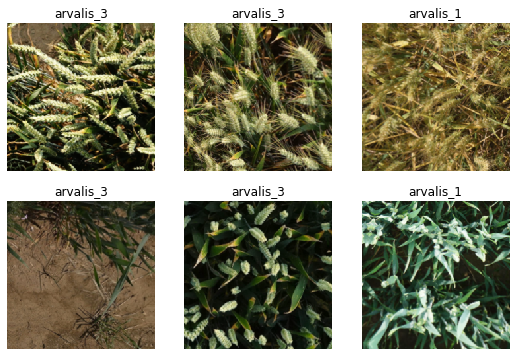

In [10]:
dls.show_batch(max_n=6)

In [11]:
learn = cnn_learner(dls,resnet34,metrics=accuracy).to_fp16()

In [12]:
learn.lr_find()

AttributeError: 'Learner' object has no attribute 'master_pgs'

In [13]:
torch.cuda.is_available()

False